In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

In [2]:
df=pd.read_csv(r'C:\Users\admin\Desktop\3.01.%20Country%20clusters.csv')

In [3]:
df

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,English
2,France,46.75,2.40,French
3,UK,54.01,-2.53,English
4,Germany,51.15,10.40,German
5,Australia,-25.45,133.11,English


In [4]:
x=df.iloc[:,1:3]

In [5]:
x

,Latitude,Longitude
0,44.97,-103.77
1,62.40,-96.80
2,46.75,2.40
3,54.01,-2.53
4,51.15,10.40
5,-25.45,133.11


In [6]:
kmeans=KMeans(2)
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [7]:
identified_clusters=kmeans.fit_predict(x)
identified_clusters

array([0, 0, 0, 0, 0, 1])

In [8]:
data=df.copy()
data['clusters']=identified_clusters

In [9]:
data

,Country,Latitude,Longitude,Language,clusters
0,USA,44.97,-103.77,English,0
1,Canada,62.40,-96.80,English,0
2,France,46.75,2.40,French,0
3,UK,54.01,-2.53,English,0
4,Germany,51.15,10.40,German,0
5,Australia,-25.45,133.11,English,1


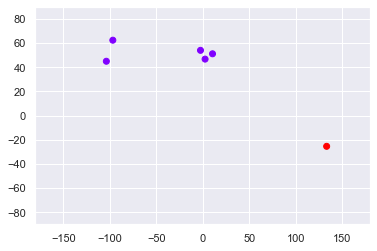

In [11]:
plt.scatter(data['Longitude'],data['Latitude'],c=data['clusters'],cmap='rainbow')
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

# Categorical Data

In [12]:
data1=df.copy()
data1['Language']=data1['Language'].map({'English':1,'French':2,'German':3})

In [13]:
data1

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,1
1,Canada,62.40,-96.80,1
2,France,46.75,2.40,2
3,UK,54.01,-2.53,1
4,Germany,51.15,10.40,3
5,Australia,-25.45,133.11,1


In [16]:
x=data1.iloc[:,1:]

In [17]:
x

,Latitude,Longitude,Language
0,44.97,-103.77,1
1,62.40,-96.80,1
2,46.75,2.40,2
3,54.01,-2.53,1
4,51.15,10.40,3
5,-25.45,133.11,1


In [18]:
kmeans=KMeans(2)
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [19]:
identified_clusters=kmeans.fit_predict(x)
identified_clusters

array([0, 0, 0, 0, 0, 1])

In [20]:
data=df.copy()
data['clusters']=identified_clusters

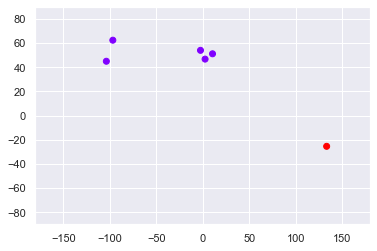

In [21]:
plt.scatter(data['Longitude'],data['Latitude'],c=data['clusters'],cmap='rainbow')
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

In [23]:
# For K=2

wcss=kmeans.inertia_
wcss

13208.95812

In [24]:
wcss=[]

for i in range(1,7):
    kmeans=KMeans(i)
    kmeans.fit(x)
    wcss_iter=kmeans.inertia_
    wcss.append(wcss_iter)

In [25]:
wcss

[42605.41356666667,
 13208.95812,
 290.10523333333333,
 113.91233333333332,
 39.00624999999998,
 0.0]

In [26]:
number_clusters=range(1,7)

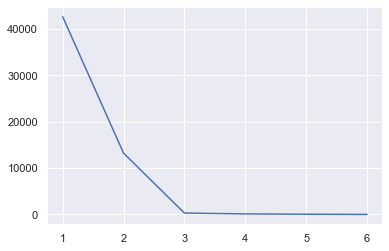

In [27]:
plt.plot(number_clusters,wcss)
plt.show()